## Simple Self-Attention for one vector (x2)

Consider the following input sentence:




In [ ]:
import torch
inputs = torch.tensor(
[[0.43, 0.15, 0.89], # x1
[0.55, 0.87, 0.66], # x2
[0.57, 0.85, 0.64],  # x3
[0.22, 0.58, 0.33], # x4
[0.77, 0.25, 0.10],# x5
[0.05, 0.80, 0.55]] # x6
)

The first step of implementing self-attention is to compute the intermediate
values ω, referred to as attention scores

The overall goal of this section is to illustrate the computation of the context vector z(2)
using the second input sequence, x(2) as a query. This figure shows the first intermediate step,
computing the attention scores ω between the query x(2) and all other input elements as a dot
product. (Note that the numbers in the figure are truncated to one digit after the decimal point to
reduce visual clutter.)

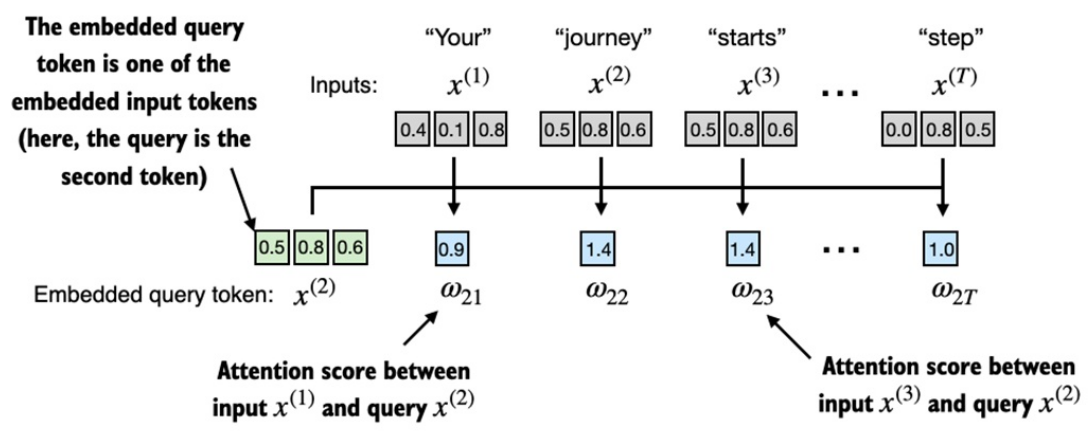

So how we calculate the intermediate attention scores
between the query token and each input token. We determine these scores by
computing the dot product of the query, x(2), with every other input token:

In [ ]:
query = inputs[1]
attn_scores_2 = torch.empty(inputs.shape[0])
for i, x_i in enumerate(inputs):
  attn_scores_2[i] = torch.dot(x_i, query)
print(attn_scores_2)

Beyond viewing the dot product operation as a mathematical tool that
combines two vectors to yield a scalar value, the dot product is a measure of
similarity because it quantifies how much two vectors are aligned: a higher
dot product indicates a greater degree of alignment or similarity between the
vectors. In the context of self-attention mechanisms, the dot product
determines the extent to which elements in a sequence attend to each other:
the higher the dot product, the higher the similarity and attention score
between two elements.

In the next step, we normalize each of the attention
scores that we computed previously.

After computing the attention scores ω21 to ω2T with respect to the input query x(2),
the next step is to obtain the attention weights α21 to α2T by normalizing the attention scores.

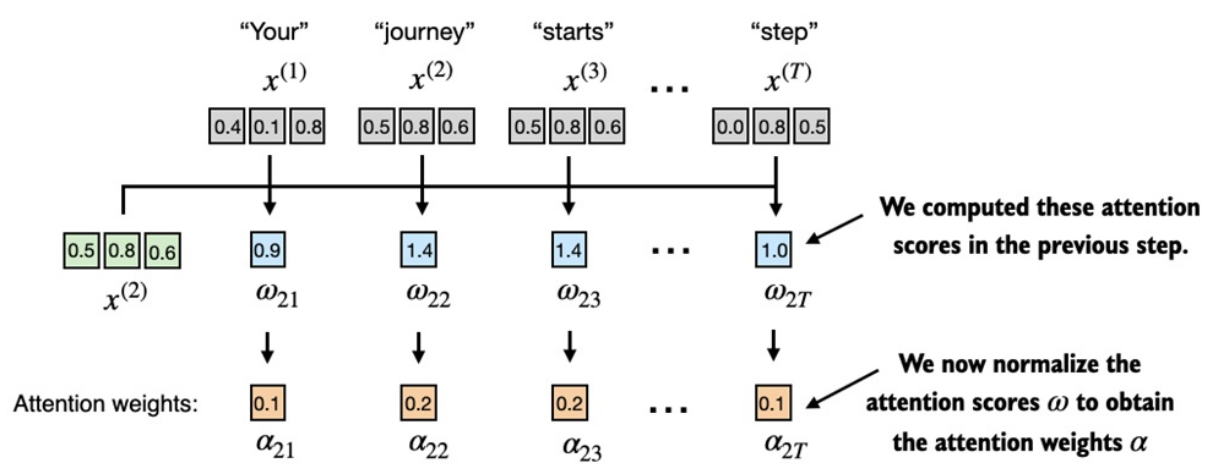

The main goal behind the normalization is to obtain
attention weights that sum up to 1. This normalization is a convention that is
useful for interpretation and for maintaining training stability in an LLM.
Here's a straightforward method for achieving this normalization step:

In [ ]:
attn_weights_2_tmp = attn_scores_2 / attn_scores_2.sum()
print("Attention weights:", attn_weights_2_tmp)
print("Sum:", attn_weights_2_tmp.sum())

In practice, it's more common and advisable to use the softmax function for
normalization. This approach is better at managing extreme values and offers
more favorable gradient properties during training. Below is a basic
implementation of the softmax function for normalizing the attention scores:

In [ ]:
def softmax_naive(x):
  return torch.exp(x) / torch.exp(x).sum(dim=0)
attn_weights_2_naive = softmax_naive(attn_scores_2)
print("Attention weights:", attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum())

In addition, the softmax function ensures that the attention weights are
always positive. This makes the output interpretable as probabilities or
relative importance, where higher weights indicate greater importance.

Note that this naive softmax implementation (softmax_naive) may encounter
numerical instability problems, such as overflow and underflow, when
dealing with large or small input values. Therefore, in practice, it's advisable
to use the PyTorch implementation of softmax, which has been extensively
optimized for performance:

In [ ]:
attn_weights_2 = torch.softmax(attn_scores_2, dim=0)
print("Attention weights:", attn_weights_2)
print("Sum:", attn_weights_2.sum())

Now that we computed the normalized attention weights, we are ready for the
final step : calculating the context vector z(2) by
multiplying the embedded input tokens, x(i), with the corresponding attention
weights and then summing the resulting vectors.

The final step, after calculating and normalizing the attention scores to obtain the
attention weights for query x(2), is to compute the context vector z(2). This context vector is a
combination of all input vectors x(1) to x(T) weighted by the attention weights.

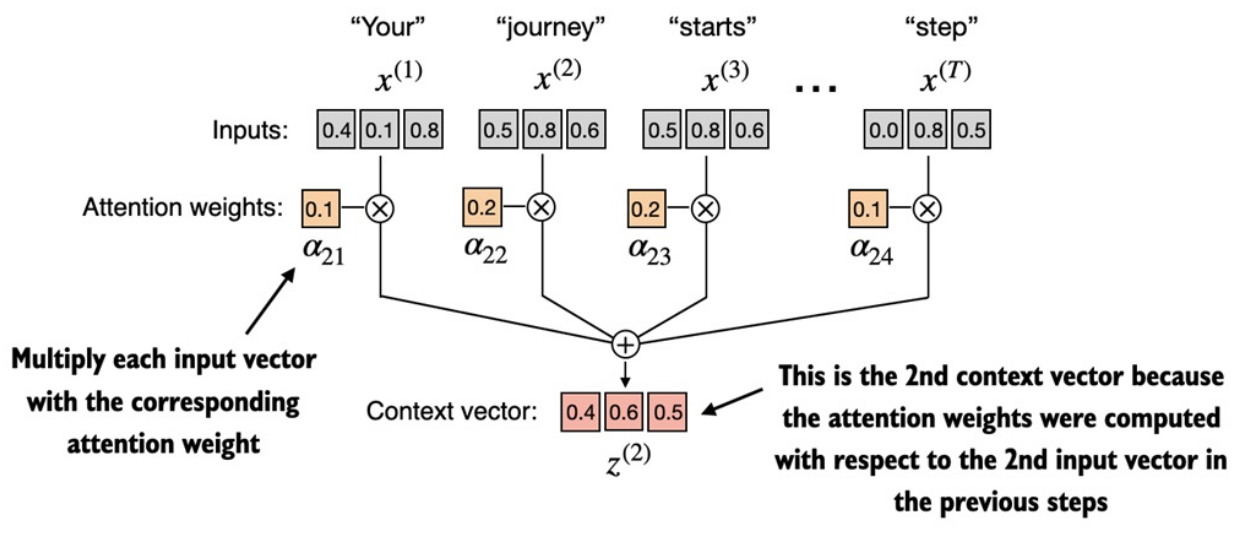

The context vector z(2) is calculated as a weighted
sum of all input vectors. This involves multiplying each input vector by its
corresponding attention weight:

In [ ]:
query = inputs[1] # 2nd input token is the query
context_vec_2 = torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
  context_vec_2 += attn_weights_2[i]*x_i
print(context_vec_2)